This notebook shows experiment results with the RBS system

# comparing different market conditions

In [1]:
# Import a set of default parameters
from IPython.display import display
from model.utility.default_parameters import default_params1 as params
# Import a default initial state
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)
params["demand_factor"] = [0.07]#[0.5,0.1]#
params["supply_factor"] = [-.07]#[-.01,-0.1]#

In [2]:
# from itertools import product

# # Change the demand and supply factors to set up different market conditions
# demand_sweep = [0.1,0.05,0.01] # demand should always be positive
# supply_sweep = [-.05] # supply should always be positive
# sweeps = list(product(*[demand_sweep, supply_sweep]))

# demand_sweep = [x[0] for x in sweeps]
# supply_sweep = [x[1] for x in sweeps]
# params["demand_factor"] = demand_sweep
# params["supply_factor"] = supply_sweep

## Run Experiment

You can set two parameters for the simulation model at this phase. The number of monte carlo runs (number_runs) and the number of timesteps for each run (number_steps). Then you load the experiment with load_config, get raw output from running the experiment, and finally apply to post-processing function to parse the data into a smaller and enhanced dataframe.

In [3]:
from model.run import load_config, run, post_processing

# Set the params for runs and timesteps
number_runs = 2
number_steps = 100

# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 19, 2, 63)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 19, 2, 63)
Execution Method: local_simulations
Execution Mode: parallelized
liq_stables_prior: 21000000, net_flow:-88520.05345921233, liq_stables:20911479.946540788
liq_stables_prior: 20911479.946540788, net_flow:1162231.4887519237, liq_stables:21745752.59281842
liq_stables_prior: 21745752.59281842, net_flow:-759744.5052419193, liq_stables:20986008.0875765
liq_stables_prior: 20986008.0875765, net_flow:111692.27312738728, liq_stables:21097700.36070389
liq_stables_prior: 21097700.36070389, net_flow:-521733.94849650236, liq_stables:20575966.412207387
liq_s

## Visualization

There are functions to easily visualize some of the results of the cadCAD runs. Below we will show some graphics from the monte carlo simulations.

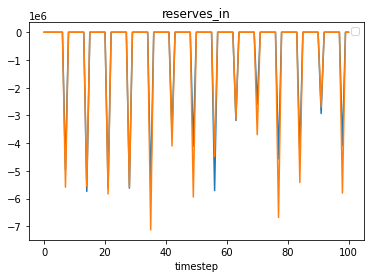

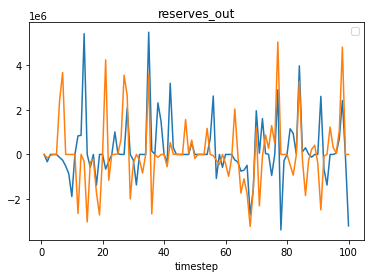

In [4]:
from model.utility.visualization import plot_all_sims

plot_all_sims(["reserves_in","reserves_out"], df)

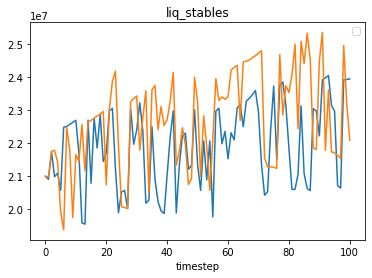

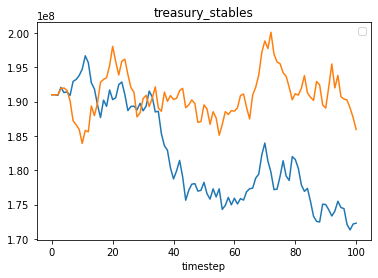

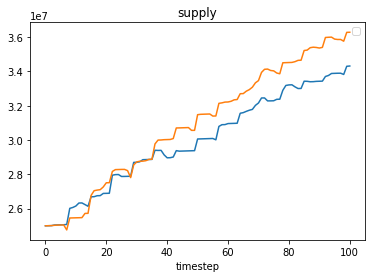

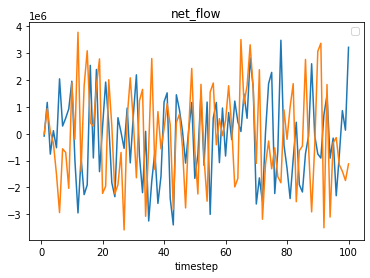

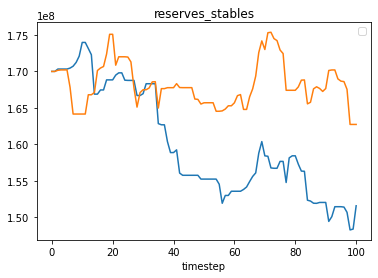

In [5]:
plot_all_sims(['liq_stables',"treasury_stables","supply", "net_flow","reserves_stables",], df)

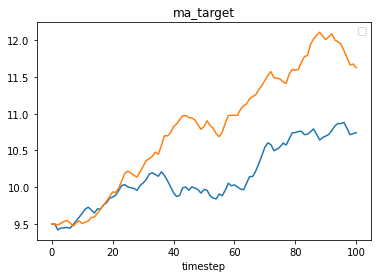

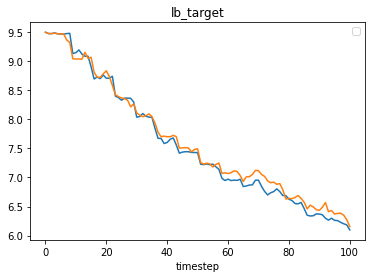

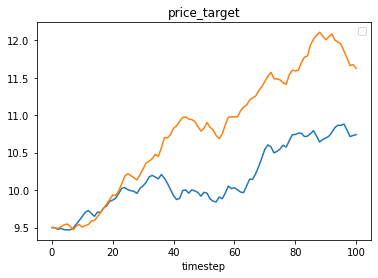

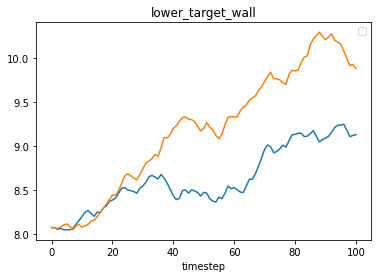

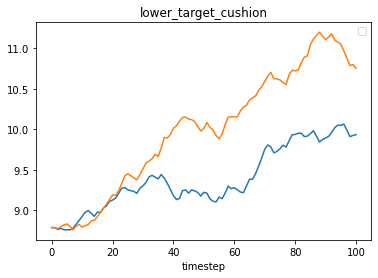

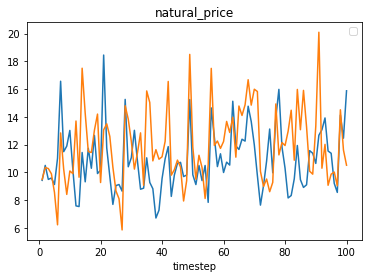

In [6]:
plot_all_sims([ "ma_target", "lb_target","price_target","lower_target_wall","lower_target_cushion",
           "natural_price"], df)